In [1]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import yaml
import math
from scipy import stats

I want to import from config file:
    Equity Name
    Equity Price
    Volatility
    Days to Expiration
I will produce a table and a graph of Call Price vs Strike

In [2]:
with open('C:/Users/Sidney/Options Study/Options Final/Options.yml', 'r') as file:
    config=yaml.safe_load(file)

In [3]:
Name=config.get('general')
Parameters=config.get('parameters')

In [4]:
print(Name)
print(Parameters)
#Name is a dictionary with the name of the equity
#Parameters is a dictionary with the value of the parameters

{'filename': 'NVDA'}
{'Price': 323.2, 'volatility': 0.42, 'Expy': 1}


Now I will make assignments to comply with the notation in the call formula

In [5]:
equity=Name.get('filename')
F=Parameters.get('Price')
sigma=Parameters.get('volatility')
T=Parameters.get('Expy')
print(equity,F,sigma,T)

NVDA 323.2 0.42 1


In [6]:
"""
F is the equity price
K is the strike price
T is the time to expiration in days
sigma is the volatility in percent divided by 100
""" 

'\nF is the equity price\nK is the strike price\nT is the time to expiration in days\nsigma is the volatility in percent divided by 100\n'

In [7]:
def d1(K):
    d1=(np.log(F/K)+0.5*(T/365)*sigma**2)/(sigma*(T/365)**0.5)
    return d1

In [8]:
def d2(K):
    d2=d1(K)-sigma*(T/365)**0.5
    return d2

In [9]:
def Call(K):
    Call=F*(stats.norm.cdf(d1(K)))-K*(stats.norm.cdf(d2(K)))
    return Call

For the 2D graph, the x label will be Strike and the Y label will be the Call Price

In [10]:
x_data=np.arange(F-0.2*F,F+0.2*F,0.1)

In [11]:
y_data=Call(x_data)

In [12]:
title='Call Price vs Strike for %s at $%.0f at %.0f Days to Expy' %(equity,F,T)
print(title)

Call Price vs Strike for NVDA at $323 at 1 Days to Expy


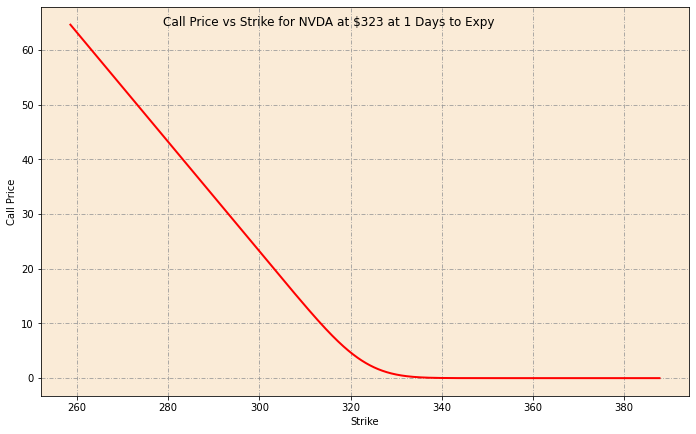

In [13]:
fig1=plt.figure(figsize=(10,6))
fig1.suptitle(title)
axes1=fig1.add_axes([0.1,0.1,0.9,0.9])
axes1.set_xlabel('Strike')
axes1.set_ylabel('Call Price')
axes1.plot(x_data,y_data,'r', lw=2, label='10% Volatility')
#axes1.legend(loc=0)
axes1.grid(True, color='0.6', dashes=(5,2,1,2))
axes1.set_facecolor('#FAEBD7')

In [14]:
graph_title='Call vs Strike for %s at %.0f at %2.0f Days to Expy' %(equity,F,T)
print(graph_title)

Call vs Strike for NVDA at 323 at  1 Days to Expy


In [15]:
fig1.savefig(graph_title)